In [92]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob

In [93]:
def get_ps_tsm_dataframes_csv(file_pattern: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Get the dataframes for the PS and TSM data from the files that match the pattern.
    """
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)

    df_ps, df_tsm = split_dataframe(df)
    
    return df_ps, df_tsm

def split_dataframe(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_ps = df[df['type'] == 'ps'].reset_index(drop=True)
    df_tsm = df[df['type'] == 'tsm'].reset_index(drop=True)
    
    return df_ps, df_tsm

def get_dataframe_csv(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

def get_dataframe_csv_no_header(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file, header=None)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

### STOI

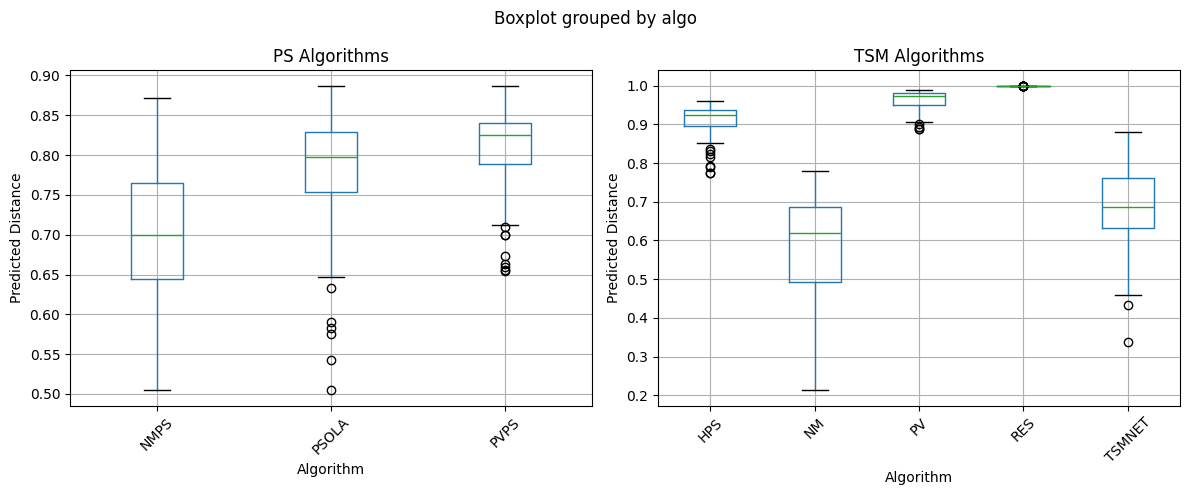

In [94]:
df_stoi_ps, df_stoi_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/stoi/*.csv")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_stoi_ps.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Predicted Distance')

# Boxplot for df_tsm
df_stoi_tsm.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Predicted Distance')

plt.tight_layout()
plt.show()

### SISNR

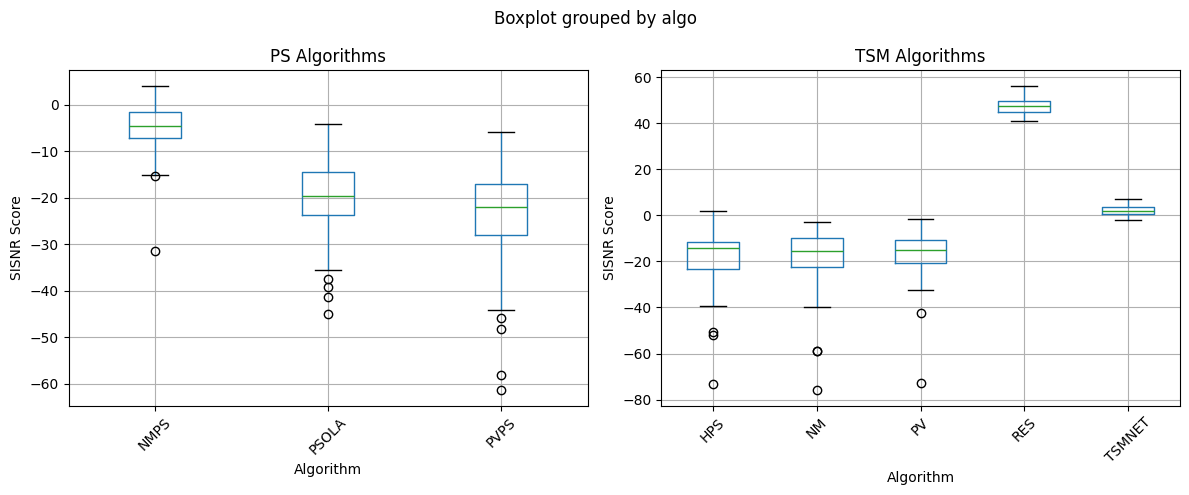

In [95]:
df_sisnr_ps, df_sisnr_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/sisnr/*.csv")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_sisnr_ps.boxplot(by='algo', column='sisnr_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('SISNR Score')

# Boxplot for df_tsm
df_sisnr_tsm.boxplot(by='algo', column='sisnr_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('SISNR Score')

plt.tight_layout()
plt.show()

### PESQ

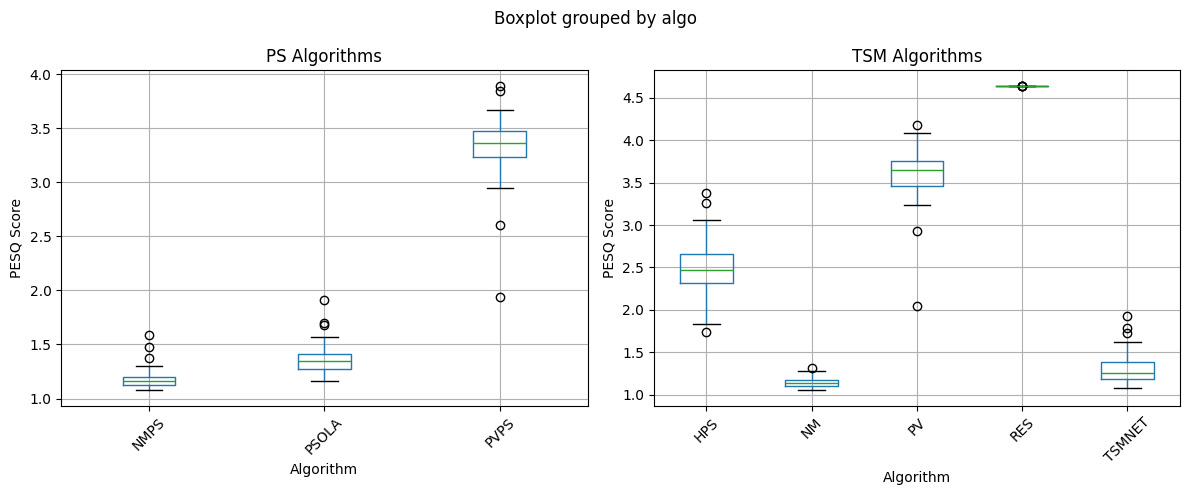

In [96]:
df_pesq_ps, df_pesq_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/pesq/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_pesq_ps.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('PESQ Score')

# Boxplot for df_tsm
df_pesq_tsm.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('PESQ Score')

plt.tight_layout()
plt.show()

### NISQA

In [97]:
df_nisqa_tts = get_dataframe_csv("evaluation/objective/nisqa/tts/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_tts['type'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[3])
df_nisqa_tts['algo'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[4])
df_nisqa_tts['factor'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[5])

df_nisqa_tts_ps, df_nisqa_tts_tsm = split_dataframe(df_nisqa_tts)

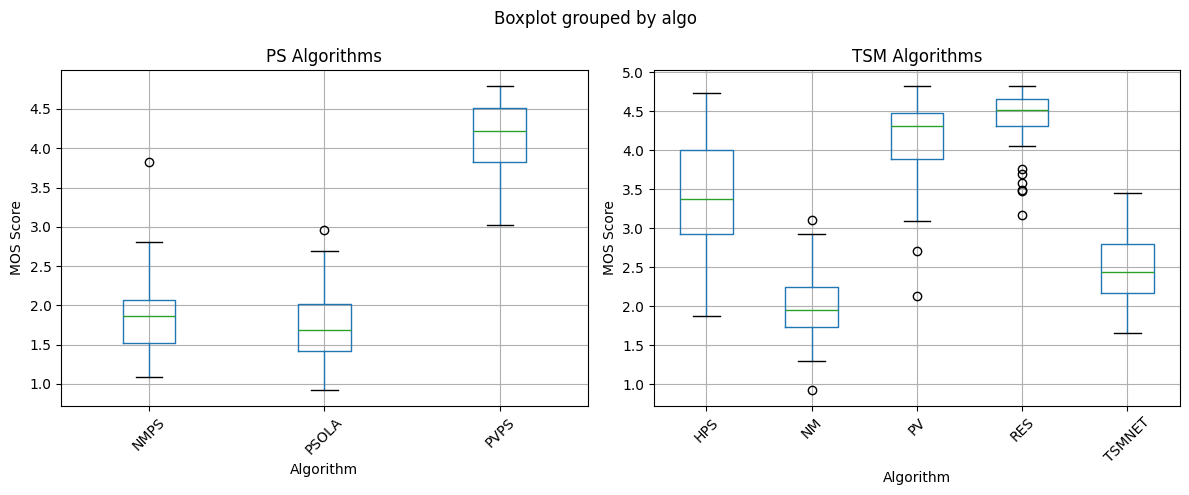

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_nisqa_tts_ps.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('MOS Score')

# Boxplot for df_tsm
df_nisqa_tts_tsm.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('MOS Score')

plt.tight_layout()
plt.show()

In [99]:
df_nisqa_std = get_dataframe_csv("evaluation/objective/nisqa/std/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_std['type'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[3])
df_nisqa_std['algo'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[4])
df_nisqa_std['factor'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[5])

df_nisqa_std_ps, df_nisqa_std_tsm = split_dataframe(df_nisqa_std)

/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_1710/3739302342.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_1710/3739302342.py:11: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])


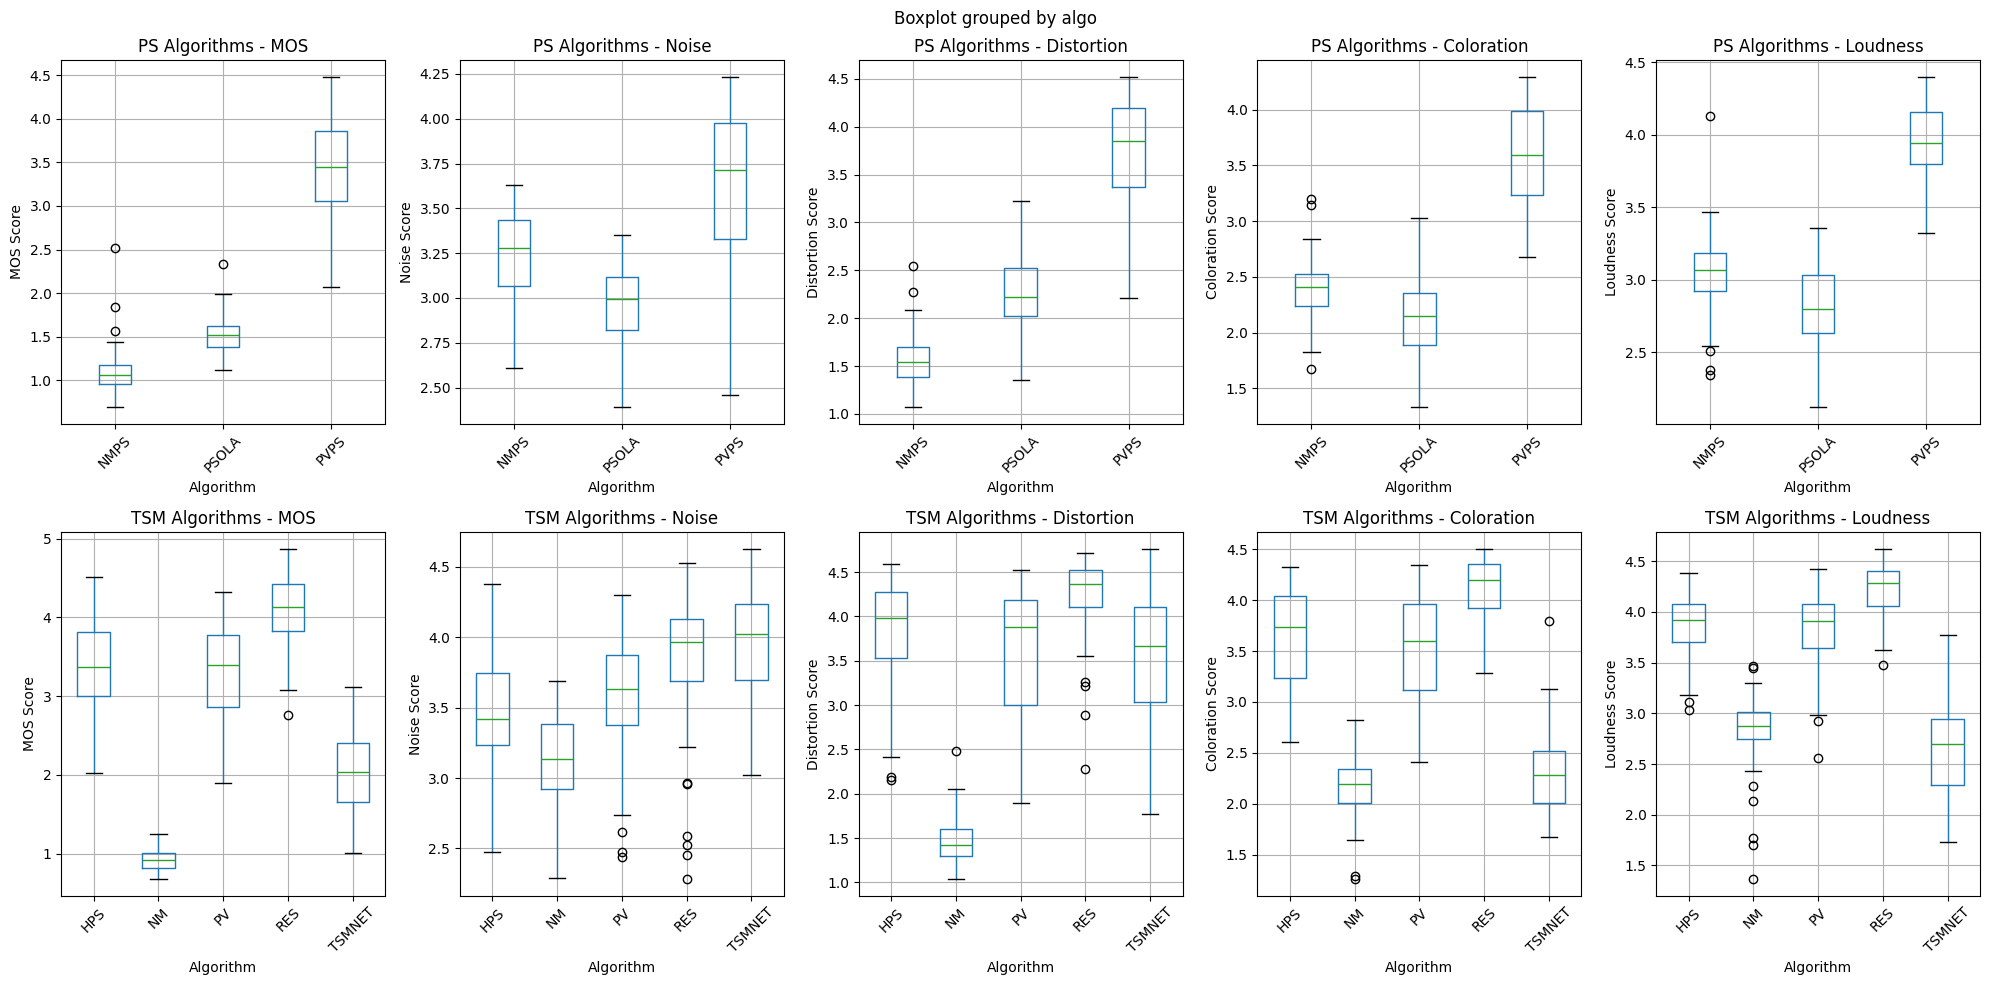

In [100]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Boxplots for df_ps
df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
for ax, metric in zip(axes[0], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

# Boxplots for df_tsm
df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])
for ax, metric in zip(axes[1], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

plt.tight_layout()
plt.show()

### Audio Aesthetics

In [101]:
df_aa = pd.DataFrame({}) 
for file in glob.iglob("evaluation/objective/audio_aesthetics/*.jsonl"):
    df_tmp = pd.read_json(file, lines=True)
    df_aa = pd.concat([df_aa, df_tmp], ignore_index=True)
    
df_aa['type'] = df_aa['path'].apply(lambda x: x.split('/')[3])
df_aa['algo'] = df_aa['path'].apply(lambda x: x.split('/')[4])
df_aa['factor'] = df_aa['path'].apply(lambda x: x.split('/')[5])

df_aa_ps, df_aa_tsm = split_dataframe(df_aa)
df_aa_ps

,path,CE,CU,PC,PQ,type,algo,factor
0,data/output/wav48/ps/NMPS/rt_up/p225/p225_039.wav,2.717722,2.674693,2.988631,3.285856,ps,NMPS,rt_up
1,data/output/wav48/ps/NMPS/rt_up/p225/p225_011.wav,2.371481,2.476852,3.195091,2.992549,ps,NMPS,rt_up
2,data/output/wav48/ps/NMPS/rt_up/p225/p225_005.wav,2.316310,2.361210,2.987355,2.916041,ps,NMPS,rt_up
3,data/output/wav48/ps/NMPS/rt_up/p225/p225_004.wav,2.427570,2.350102,2.464523,2.991605,ps,NMPS,rt_up
4,data/output/wav48/ps/NMPS/rt_up/p225/p225_010.wav,2.884826,2.644479,2.504509,3.189688,ps,NMPS,rt_up
...,...,...,...,...,...,...,...,...
202,data/output/wav48/ps/PSOLA/rt_up/p225/p225_035...,3.612574,4.116762,1.904095,3.846378,ps,PSOLA,rt_up
203,data/output/wav48/ps/PSOLA/rt_up/p225/p225_021...,4.060493,4.798038,1.760272,4.416765,ps,PSOLA,rt_up
204,data/output/wav48/ps/PSOLA/rt_up/p225/p225_009...,3.788561,3.879004,1.696536,3.672628,ps,PSOLA,rt_up
205,data/output/wav48/ps/PSOLA/rt_up/p225/p225_008...,4.088601,4.544979,1.684410,3.941910,ps,PSOLA,rt_up


/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_1710/3181119340.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_ps.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[0])
/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_1710/3181119340.py:11: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_tsm.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[1])


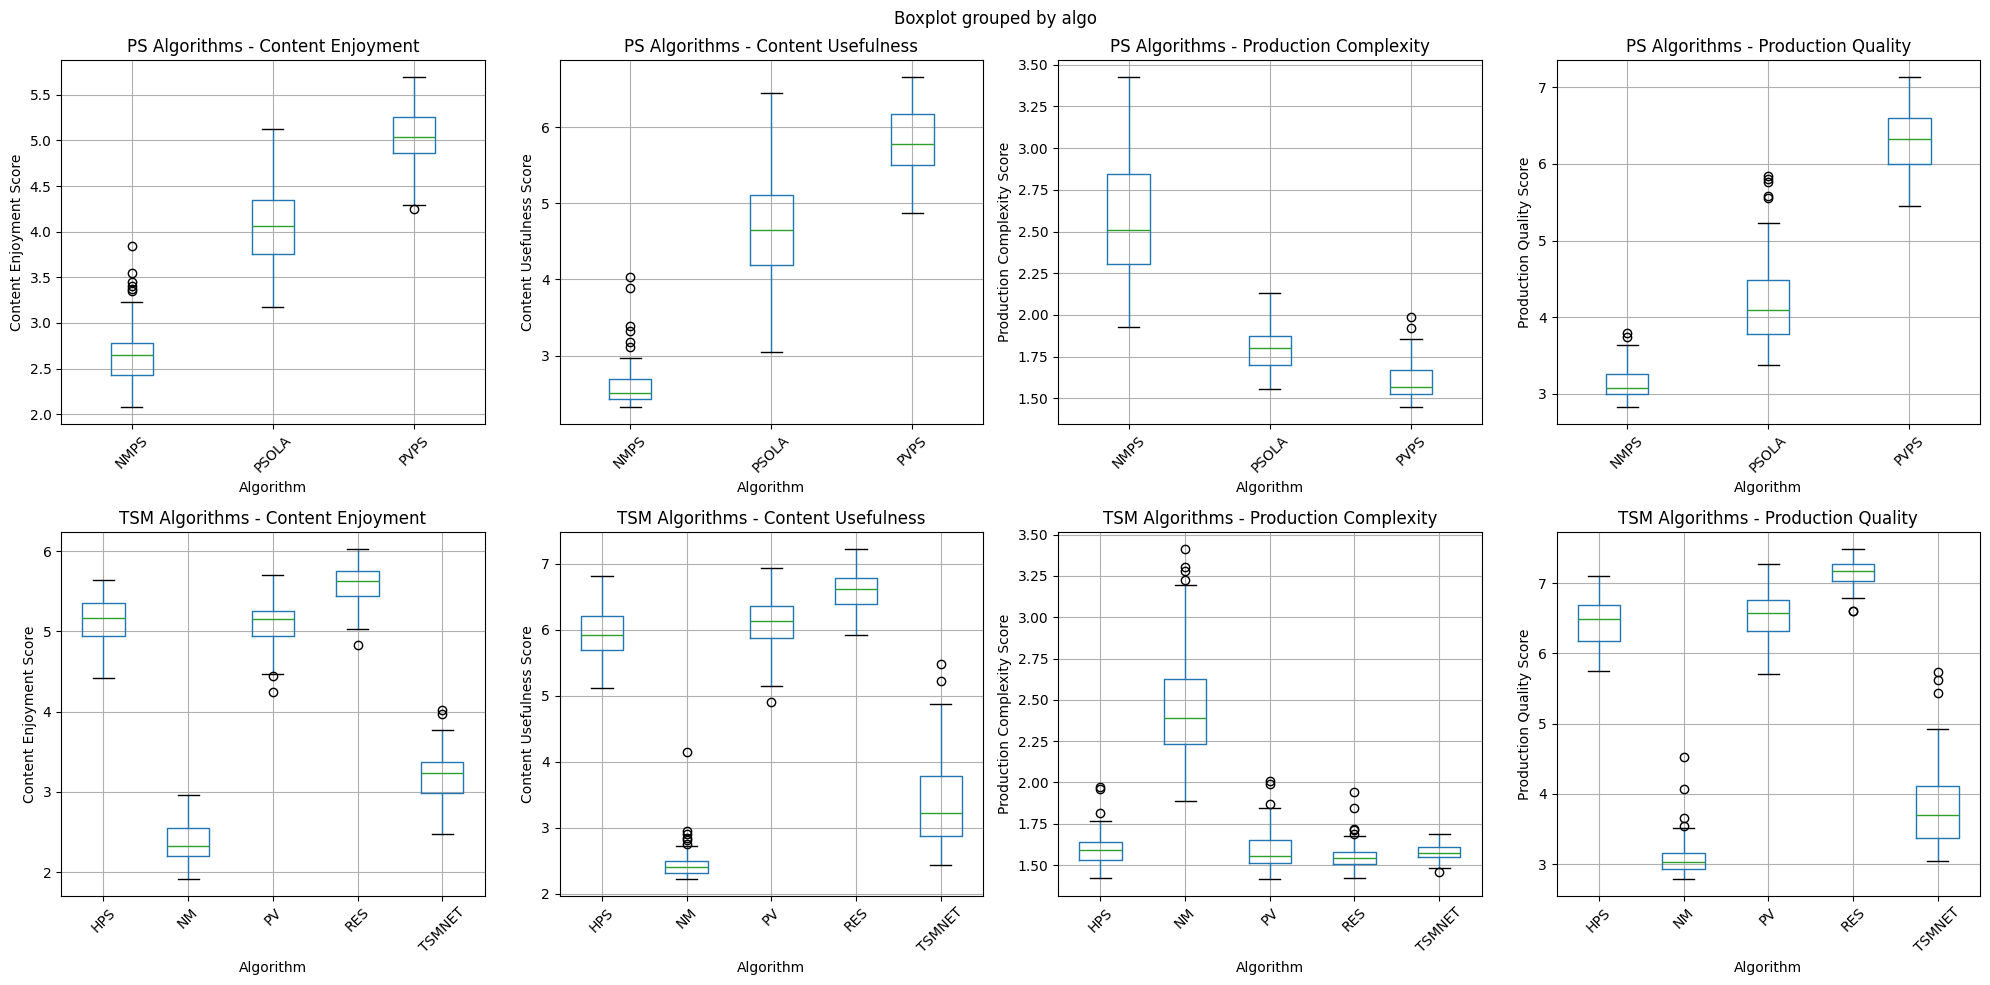

In [102]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Boxplots for df_ps
df_aa_ps.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[0])
for ax, metric in zip(axes[0], ['Content Enjoyment', 'Content Usefulness', 'Production Complexity', 'Production Quality']):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

# Boxplots for df_tsm
df_aa_tsm.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[1])
for ax, metric in zip(axes[1], ['Content Enjoyment', 'Content Usefulness', 'Production Complexity', 'Production Quality']):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

plt.tight_layout()
plt.show()

### VISQOL

In [103]:
df_visqol = get_dataframe_csv_no_header("evaluation/objective/visqol/*.csv")
df_visqol.columns = ['input_path', 'output_path', 'score']

df_visqol['type'] = df_visqol['output_path'].apply(lambda x: x.split('/')[4])
df_visqol['algo'] = df_visqol['output_path'].apply(lambda x: x.split('/')[5])
df_visqol['factor'] = df_visqol['output_path'].apply(lambda x: x.split('/')[6])

df_visqol_ps, df_visqol_tsm = split_dataframe(df_visqol)
df_visqol_ps

,input_path,output_path,score,type,algo,factor
0,/data/input/wav16/p225/p225_039.wav,/data/output/wav16/ps/NMPS/rt_up/p225/p225_039...,2.440546,ps,NMPS,rt_up
1,/data/input/wav16/p225/p225_011.wav,/data/output/wav16/ps/NMPS/rt_up/p225/p225_011...,2.442731,ps,NMPS,rt_up
2,/data/input/wav16/p225/p225_005.wav,/data/output/wav16/ps/NMPS/rt_up/p225/p225_005...,2.372385,ps,NMPS,rt_up
3,/data/input/wav16/p225/p225_004.wav,/data/output/wav16/ps/NMPS/rt_up/p225/p225_004...,2.443041,ps,NMPS,rt_up
4,/data/input/wav16/p225/p225_010.wav,/data/output/wav16/ps/NMPS/rt_up/p225/p225_010...,2.440671,ps,NMPS,rt_up
...,...,...,...,...,...,...
202,/data/input/wav16/p225/p225_035.wav,/data/output/wav16/ps/PVPS/rt_up/p225/p225_035...,3.013933,ps,PVPS,rt_up
203,/data/input/wav16/p225/p225_021.wav,/data/output/wav16/ps/PVPS/rt_up/p225/p225_021...,3.483499,ps,PVPS,rt_up
204,/data/input/wav16/p225/p225_009.wav,/data/output/wav16/ps/PVPS/rt_up/p225/p225_009...,3.062689,ps,PVPS,rt_up
205,/data/input/wav16/p225/p225_008.wav,/data/output/wav16/ps/PVPS/rt_up/p225/p225_008...,3.235523,ps,PVPS,rt_up


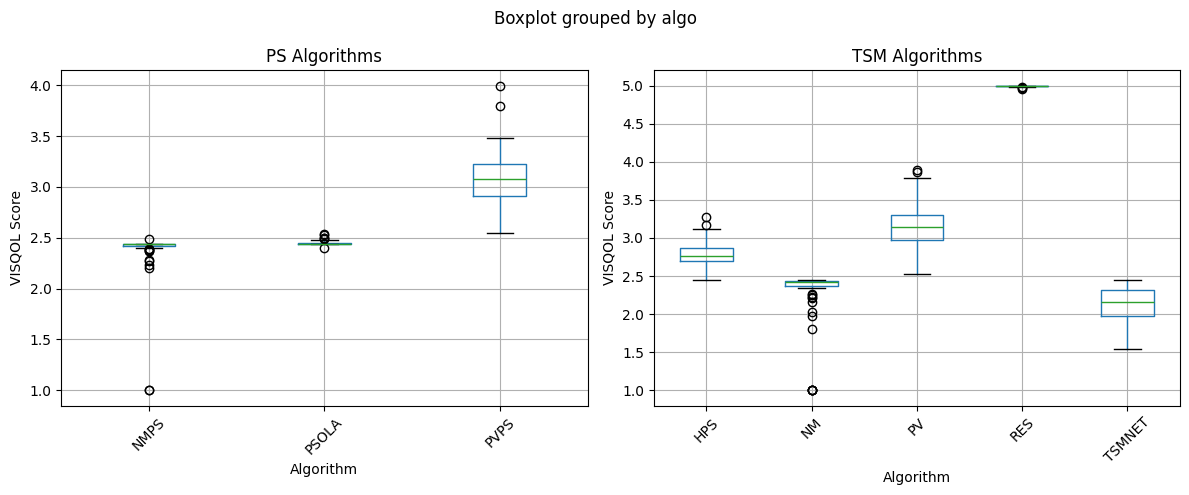

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_visqol_ps.boxplot(by='algo', column='score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('VISQOL Score')

# Boxplot for df_tsm
df_visqol_tsm.boxplot(by='algo', column='score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('VISQOL Score')

plt.tight_layout()
plt.show()